# Dependencies

In [38]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [54]:
conda install -c conda-forge umap-learn


Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bzwii\anaconda3

  added / updated specs:
    - umap-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2024.3.11-~ --> conda-forge::ca-certificates-2024.2.2-h56e8100_0 
  certifi            pkgs/main/win-64::certifi-2024.2.2-py~ --> conda-forge/noarch::certifi-2024.2.2-pyhd8ed1ab_0 
  openssl              pkgs/main::openssl-1.1.1w-h2bbff1b_0 --> conda-forge::openssl-1.1.1w-hcfcfb64_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [55]:
import umap

C:\Users\bzwii\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [56]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


# Whole Cellular Data 

In [61]:
ABMetrics = pd.read_excel("C:/Users/bzwii/TablesForABPaper.xlsx")
ABMetrics = ABMetrics.drop(ABMetrics.columns[1], axis=1)
ABMetrics.head()

,Cell,Cell Volume(Voxels),Cell Volume (µm3),Nucleus Volume(Voxels),Nucleus Volume (µm3),Nucleus Volume(%),Nucleus LAC,Vesicle Volume(Pixels),Vesicle Volume,Vesicle Volume(%),Vesicle LAC,Vesicle Number,Vesicle Diameter(nm),Cytosol LAC,Mito LAC
0,Alpha,7674329,627.349566,1638764,133.963228,21.353841,0.212327,86074,7.036249,1.121583,0.359683,880,233.674833,0.235484,0.300179
1,Alpha,25666836,693.004572,3182402,85.924854,12.398887,0.260214,159631,4.310037,0.621935,0.414656,915,201.417440,0.291446,0.385294
2,Alpha,8672271,624.328029,1913852,137.780686,22.068637,0.199607,151106,10.878317,1.742404,0.325079,1934,248.927009,0.241617,0.339728
3,Alpha,4965041,357.439736,1244977,89.627508,25.074858,0.248341,50123,3.608420,1.009518,0.379200,966,192.820246,0.287751,0.355074
4,Alpha,3113608,224.152675,896693,64.554091,28.799162,0.251484,46209,3.326646,1.484098,0.383205,828,189.086168,0.274834,0.365163


In [65]:
column_titles = [title for title in ABMetrics.columns if title != 'Cell']
print(column_titles)

# Now, you can directly use the column titles to select data from your DataFrame
ABMetrics_data = ABMetrics[column_titles].values


['Cell Volume(Voxels)', 'Cell Volume (µm3)', 'Nucleus Volume(Voxels)', 'Nucleus Volume (µm3)', 'Nucleus Volume(%)', 'Nucleus LAC', 'Vesicle Volume(Pixels)', 'Vesicle Volume', 'Vesicle Volume(%)', 'Vesicle LAC ', 'Vesicle Number ', 'Vesicle Diameter(nm)', 'Cytosol LAC', 'Mito LAC']


In [66]:
#if want to scale data first

scaled_ABMetrics_data = StandardScaler().fit_transform(ABMetrics_data)

In [150]:
reducer = umap.UMAP(n_neighbors=4,
                      min_dist=0.2,
                      metric='canberra')

In [151]:
embedding = reducer.fit_transform(scaled_ABMetrics_data)
embedding.shape

(15, 2)

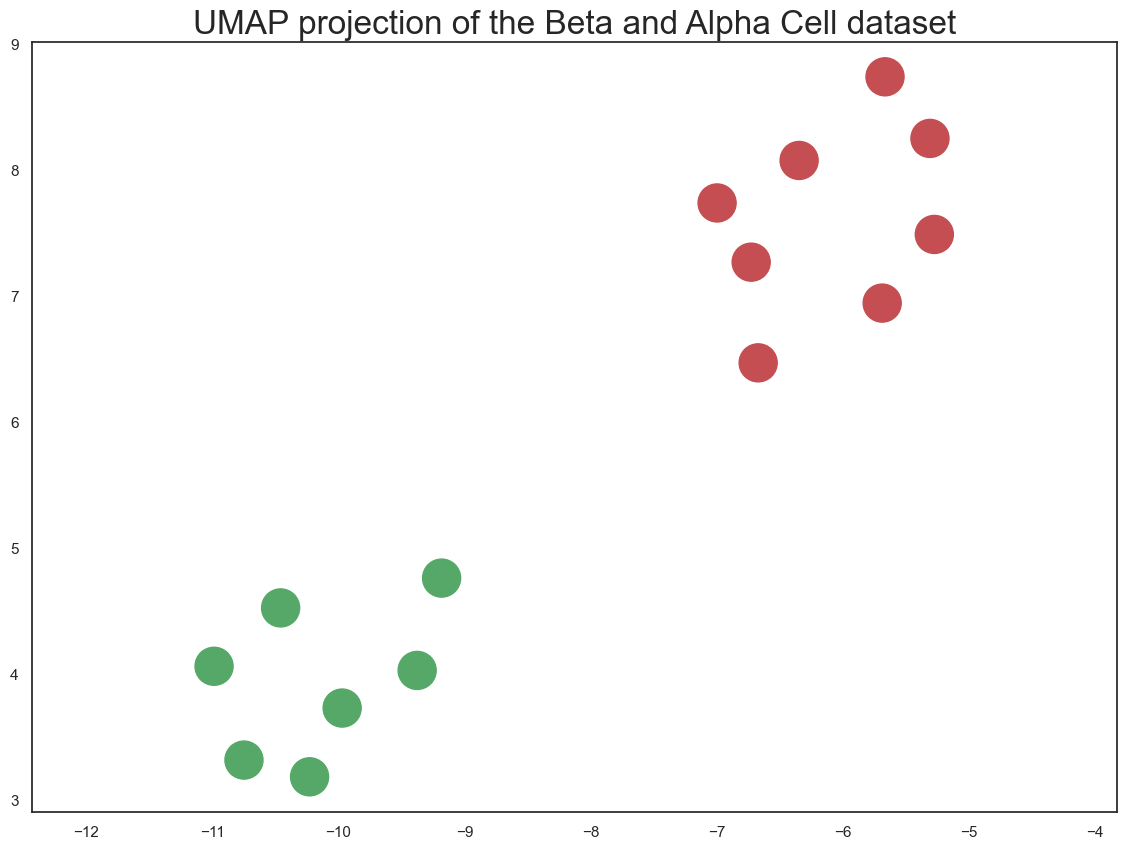

In [152]:
dot_size = 750 
palette = sns.color_palette()
cell_colors = ABMetrics.Cell.map({"Beta": 2, "Alpha": 3})

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[palette[x] for x in cell_colors],
    s=dot_size
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Beta and Alpha Cell dataset', fontsize=24);

plt.savefig("E:/Paper Figures/AlphaBetaPaper/UMAP Alpha Beta Whole Cells.png")